In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [74]:
data = pd.read_csv(r"./tercero_ds.csv")

In [75]:
data.columns

Index(['Unnamed: 0', 'property_type', 'l2', 'lat', 'lon', 'bathrooms',
       'bedrooms', 'price', 'target'],
      dtype='object')

In [76]:
X = data[['property_type', 'l2', 'lat', 'lon', 'bathrooms',
       'bedrooms']]                                                    
y = data.target # Etiqueta a predecir

## **1. Árbol de decisión**
practica 1 clase 2

Ahora que tenemos nuestras variables predictoras `X`, por un lado, y nuestra varible a predecir `y`, por el otro, vamos a crear un modelo de árbol de decisión.

In [78]:
from sklearn.tree import DecisionTreeClassifier

# Instanciamos un objeto de la clase DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 20, random_state = 42) 

In [86]:
clf.fit(X.values,y.values)

DecisionTreeClassifier(max_depth=59)

In [87]:
#Probamos el modelo
y_pred = clf.predict(X.values)

In [81]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y,y_pred))

0.9603916904321029


In [9]:
#vemos el arbol
"""from sklearn import tree
plt.figure(figsize = (10,7))
tree.plot_tree(clf, filled = True)
plt.show()"""

'from sklearn import tree\nplt.figure(figsize = (10,7))\ntree.plot_tree(clf, filled = True)\nplt.show()'

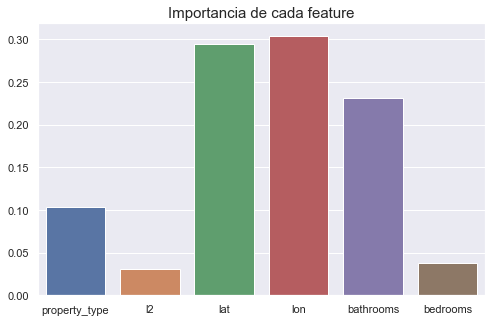

In [82]:
# Ploteamos la importancia de los atributos elegidos a la hora de hacer la predicción
plt.figure(figsize = (8,5))

importances = clf.feature_importances_
columns = X.columns
sns.barplot(x = columns, y = importances)
plt.title('Importancia de cada feature', fontsize = 15)
plt.show()

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from IPython.display import clear_output

In [84]:
#Guardamos en listas las posibilidades diferentes que tenemos en medida de que parte del dataset tomamos como entrenamiento y cual de test
tree_train_scores_mean = []
tree_train_scores_std = []

profundidades = np.arange(1,60,1)
i = 0
i_max = len(profundidades)
for profundidad in profundidades:
    i = i + 1
    clf = DecisionTreeClassifier(max_depth=profundidad)
    #validación cruzada en el árbol de decision
    #cv = indica en la cantidad de partes que sera dividido el dataset
    tree_scores = cross_validate(clf, X, y, cv=5, return_train_score=True, n_jobs = -1)
    
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    clear_output(wait=True)
    print('Completado: ' + str(round(i / i_max * 100, 2)) + '%')

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)

Completado: 100.0%


ergfewrgqergeqr

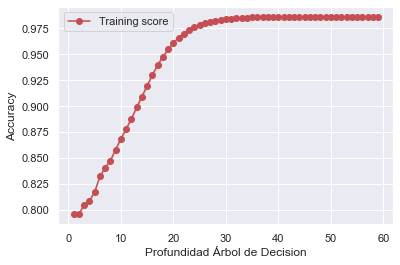

In [85]:
plt.fill_between(profundidades, tree_train_scores_mean - tree_train_scores_std,
                 tree_train_scores_mean + tree_train_scores_std, alpha=0.1,
                 color="r")
plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad Árbol de Decision')
plt.show()

In [18]:
#podriamos definir un valor optimo dentro de los 27 de profundidad

prueba

In [88]:
#probamos el arbol de desicion en el test
test_df = pd.read_csv("./test3_df.csv")

In [89]:
X_test = test_df[['property_type', 'l2', 'lat', 'lon', 'bathrooms',
       'bedrooms']]
y_pred_test = clf.predict(X_test.values)
    

In [90]:
y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [91]:
pred = pd.DataFrame(y_pred_test, columns=["pred"])

In [70]:
pred.value_counts()

pred
0       54886
1       10964
dtype: int64

In [93]:
pred.value_counts()

pred
0       48056
1       17794
dtype: int64

In [73]:
pred.head()

,pred
0,0
1,0
2,0
3,1
4,0


In [94]:
pred.to_csv("Matias-Harper.csv", index=False)